In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
from sklearn import metrics 
from sklearn.metrics import *

In [3]:
from sklearn import model_selection
from sklearn.model_selection import *


In [4]:
import seaborn as sns

In [5]:
svm = pd.read_csv('heart_failure_clinical_records_dataset.csv')
svm

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [6]:
df = pd.DataFrame(svm)
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [7]:
df.shape

(299, 13)

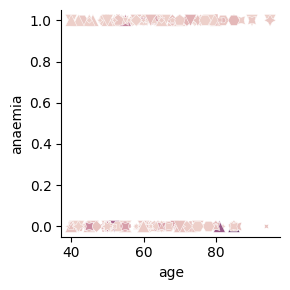

In [8]:
fg = sns.FacetGrid(df)
fg.map(sns.scatterplot, 'age', 'anaemia','creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium','sex', 'smoking', 'time')

In [9]:
x = df.drop('DEATH_EVENT',axis=1)
y = df['DEATH_EVENT']

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3)
x_test

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
28,58.000,1,60,0,38,0,153000.0,5.8,134,1,0,26
236,75.000,0,119,0,50,1,248000.0,1.1,148,1,0,209
105,72.000,1,328,0,30,1,621000.0,1.7,138,0,1,88
29,82.000,0,70,1,30,0,200000.0,1.2,132,1,1,26
102,80.000,0,898,0,25,0,149000.0,1.1,144,1,1,87
...,...,...,...,...,...,...,...,...,...,...,...,...
141,46.000,1,291,0,35,0,348000.0,0.9,140,0,0,109
271,51.000,0,582,1,40,0,221000.0,0.9,134,0,0,244
136,65.000,1,59,1,60,0,172000.0,0.9,137,0,0,107
61,50.000,0,318,0,40,1,216000.0,2.3,131,0,0,60


In [62]:
svm = MLPClassifier(hidden_layer_sizes=70, max_iter=66, alpha=1e-4)

In [63]:
clf = SVC(kernel='poly', random_state=0, gamma=.5, C=1.0)
svm.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=70, max_iter=66)

In [64]:
y_pred = svm.predict(x_test)

In [65]:
y_pred == y_test

28     False
236     True
105    False
29     False
102     True
       ...  
141     True
271     True
136     True
61     False
185    False
Name: DEATH_EVENT, Length: 90, dtype: bool

In [66]:
confusion_matrix(y_test, y_pred)

array([[62,  0],
       [28,  0]], dtype=int64)

In [67]:
svm.score(x_train, y_train)

0.6746411483253588

In [68]:
svm.score(x_test, y_test)

0.6888888888888889

In [69]:
metrics.precision_recall_fscore_support(y_test, y_pred, average='weighted')

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.4745679012345679, 0.6888888888888889, 0.5619883040935673, None)

In [21]:
scores = cross_val_score(clf, x, y,cv=5, scoring='accuracy', n_jobs=-1)
scores


KeyboardInterrupt: 

In [ ]:
scores.mean()

NameError: name 'scores' is not defined

In [ ]:
from sklearn.impute import SimpleImputer